In this demonstrative program, we will learn to process images of various fashionwear and train a machine learning program to predict different classes of clothing and accessories. Using data from Keras (same source commonly used to load training sets of integers) we will put together a training set and a test set and we will build a Neural Network to classify the various images of clothing. The data consists of low resolution 28x28 pixel images of individual articles of clothing.

In [ ]:
#import tensorflow, keras and other libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


Below we will load the data from Keras into four Numpy arrays. Two of the arrays, train_images and test_images, contain the individual image transformed into a 28x28 Numpy array marking the pixel value (ranging from 0 to 255) of each pixel in the image. The arrays train_labels and test_labels encode values 0-9, each representing a class of images. 

| Label | Class   |
|------|------|
|   0  | T-shirt|
|   1  | Pants|
|   2  | Pullover|
|   3  | Dress|
|   4  | Coat|
|   5  | Sandal|
|   6  | Shirt|
|   7  | Sneaker|
|   8  | Bag|
|   9  | Ankle Boot|


In [6]:
#Loading dataset into four NumPy arrays
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels)=fashion_mnist.load_data()

#Class names are NOT included with the dataset, so we have to add these in manually
class_names = ['T-shirt', 'Pants', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Let's see how many images we have in our training set and that it loaded properly
train_images.shape

(60000, 28, 28)

We want to now preprocess the images. As we will see below with a couple of examples, the images are an array of 28x28 pixels, each with a value in the range 0 to 255. We first want to scale this down to be from 0 to 1. It's important to note that we apply the same preprocessing to both the training and testing set.

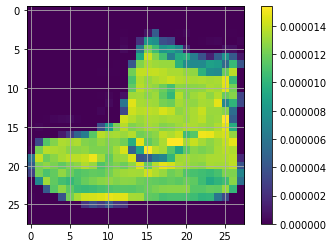

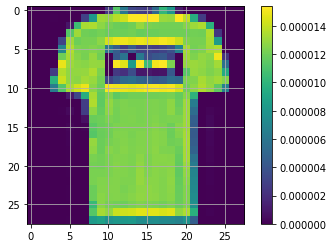

In [15]:
#Scale the value of each pixel
train_images = train_images / 255.0
test_images = test_images / 255.0

#plot a couple of examples
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(True)
plt.show()

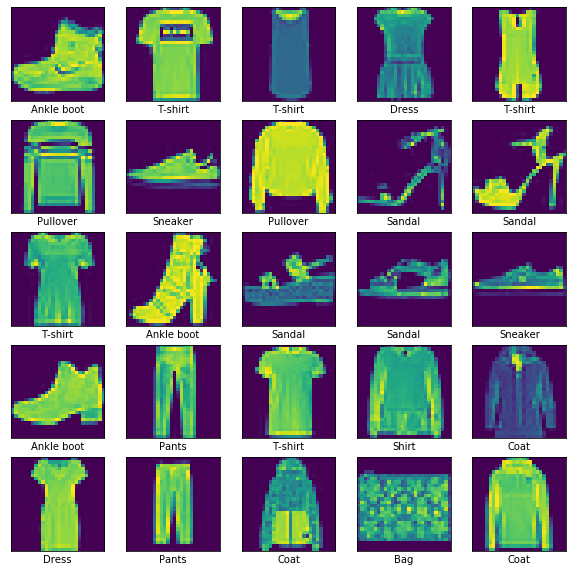

In [77]:
#Verify that the data is in proper form. We'll display a few images from the dataset with corresponding labels.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i])
    #plt.imshow(train_images[i], cmap=plt.cm.binary) #This will do the same thing but in grayscale
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Now it's time to build the layers of the model. We'll build a few layers that we'll chain together. The parameters are learned while we train the model with our data. We'll first introduce a layer that reformats the data. Namely, the "flatten" layer below transforms the 28x28 matrix into a 1 dimensional array of length 784. Afterwards, we introduce two dense layers (dense here means fully connected layers). As the images are propagated through the model, they result in one of the 10 outputs of the last layer, indicating the class they belong to with highest probability. 

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Before we train our model, we also need to include a few functions to monitor progress. We need a loss function, or cost function, that measures how accurately the model is fitting the training data, such as mean squared error. In general, the goal is to minimize this function but not so much that we "overfit" our data.

We need an optimizer that updates the weights of the nodes in the layers based on results from the cost function after propagating data through the network. Simple machine learning algorithms might use gradient descent, for instance. 

Finally, we need an actual metric to quantify the accuracy of our model. We will use the one called 'accuracy', which simply measures the fraction of images correctly classified.

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Now we are ready to fit our model to our training data. Note below the use of the term 'epochs'. This merely refers to the number of times we propagate the entirety of our data set through our model to update our weights. By doing so, we increase the accuracy of the model, seen below.

In [69]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.8572 - accuracy: 0.6718
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.8565 - accuracy: 0.6720
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.8558 - accuracy: 0.6730
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.8552 - accuracy: 0.6727
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.8550 - accuracy: 0.6738
Epoch 6/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.8544 - accuracy: 0.6734
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.8540 - accuracy: 0.6732
Epoch 8/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.8534 - accuracy: 0.6734
Epoch 9/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.8530 - accuracy: 0.6749
Epoch 10/10
60

With our model trained, we can run it on our test set to see how well it evaluates the test data.

In [70]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 0s - loss: 0.8609 - accuracy: 0.6718


Here, we want to start making predictions. To do so, we're going to introduce probabilistic models which are easier to interpret for us inferior humans. We can then output a bargraph which indicates for us what classes of objects the model believes the image could represent along with the respective probabilities for those outcomes.

In [71]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's demonstrate the visual aid of the probabilistic model with a couple of examples. We'll highlight the correct output in blue, and the output that the model predicts with highest probability in red. If these are the same, we'll let the blue overlap to indicate accuracy.

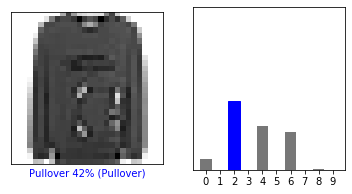

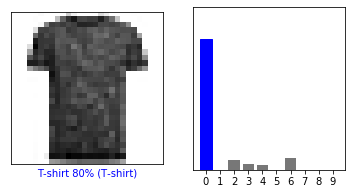

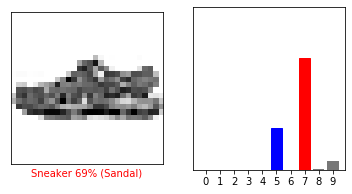

In [83]:
i = 46
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 125
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 21
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Notice above that in the last example, our model was very confident that the image was of a sneaker, when in fact it is a sandal. It is important to realize that obtaining 100% accuracy is not a practical goal, and can often result in other problems, such as overfitting. Let's plot a collection of predictions and see how our model treats different images.

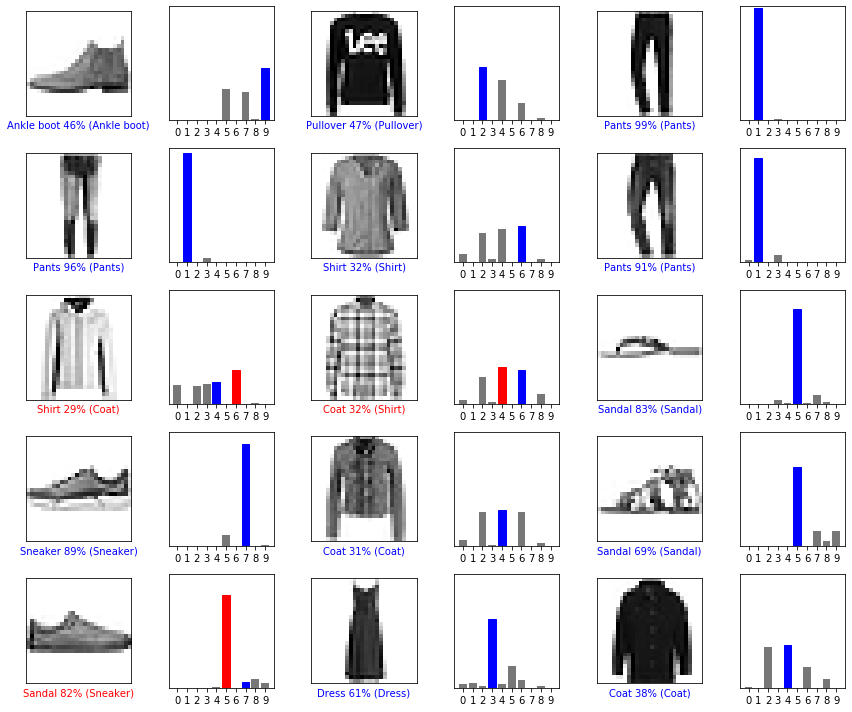

In [74]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

There is obviously room for improvement here. We can see that there are outliers in certain categories, such as sneakers that look like sandals. Additionally, some shirts and coats look too alike, and we may want to think of ways of discerning them further. 